# Stats & Pandas Basics
**Date**: Sunday, 01 February, 2026

**Goals**:
- [ ] Concepts: Mean, Median, Mode, Outliers | Variance & SD | Pandas filtering & slicing
- [ ] Practice: Compute stats on dataset, create subsets
- [ ] Mini-extension: Boxplot + histogram
- [ ] Exercise: Filter top 10% sales and visualize
- [ ] Log reflection


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
df = sns.load_dataset("titanic")

- survived: Whether passenger survive or not
- pclass: Passenger class
- sex: Gender of passenger
- age: Age of passenger
- sibsp: No of sibling/spouse aboard
- parch: No of parents aboard
- fare: Passenger fare
- embarked: Port of embarktion

## Explore Dataset
Purposes:


Actions:
- Check data, columns, types, missing values
- Quick summary of numeric & categorical features

In [58]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [59]:
df.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


In [60]:
df.shape

(891, 15)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Based on the result of info, we can note that there are columns with missing values which include `age`, `deck`, `embarked` and `embark_town`.

> Note: To check for missing value, we can use `df.isnull().sum()` as well.

## Central Tendency
- Mean, Median, Mode
- Compare age, fare, other numeric features

In [62]:
# List all numerical columns
num_cols = df.select_dtypes(include=["int64", "float64"])
num_cols.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [63]:
num_cols.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Based on the result, we can notice the `fare` column as below:
- median is half of mean which can be considered that there is right skew happening here.
- max is super larger than mean, there could be extreme large outliers values here.


## Spread & Outliers
- Standard Deviation
- Identify outliers (e.g., age, fare)
- Understand distribution differences

### Spread

In [64]:
num_cols.std()

,0
survived,0.486592
pclass,0.836071
age,14.526497
sibsp,1.102743
parch,0.806057
fare,49.693429


In [65]:
num_cols.std() / num_cols.mean()

,0
survived,1.267701
pclass,0.362149
age,0.489122
sibsp,2.108464
parch,2.112344
fare,1.543073


Standard deviation alone, we cannot define if spread is big or small. So we can compare it to mean by calculating Covariance `std/mean`.
- `cov < 0.3` -> low spread
- `cov > 0.7` -> high spread
- `0.3 > cov > 0.7` -> moderate spread

Based on the result of the covariance above, we see that `fare` has the highest spread.

### Outlier
To calculate outliers, we can check on IQR.
- Quartiles:
  - q1: 25%
  - q2: 50%
  - q3: 75%
- Inter-quartile range: iqr = q3 - q1
- Bounding:
  - lower = q1 - 1.5iqr
  - upper = q3 + 1.5iqr

Any values that are **smaller** than **lower bound** or **bigger** than **upper bound** are **outliers**.

As notice above, we can only check for outliers for `fare` column.

In [82]:
q1_fare, q3_fare = np.percentile(df["fare"], [25, 75])
iqr_fare = q3_fare - q1_fare
lower_fare = q1_fare - 1.5*iqr_fare
upper_fare = q3_fare + 1.5*iqr_fare
# print(lower_fare, q1_fare, q3_fare, upper_fare)
outliers_fare = [x for x in df["fare"] if x < lower_fare or x > upper_fare]
print(f"Total Outliers: {len(outliers_fare)}")
print(f"Outliers: {outliers_fare}")

Total Outliers: 116
Outliers: [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


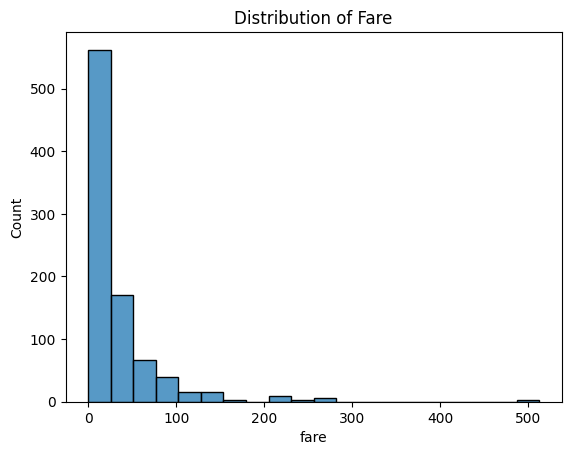

In [81]:
# Show distribution
sns.histplot(df["fare"], bins=20)
plt.title("Distribution of Fare")
plt.show()

Text(0.5, 1.0, 'Box plot of Fare')

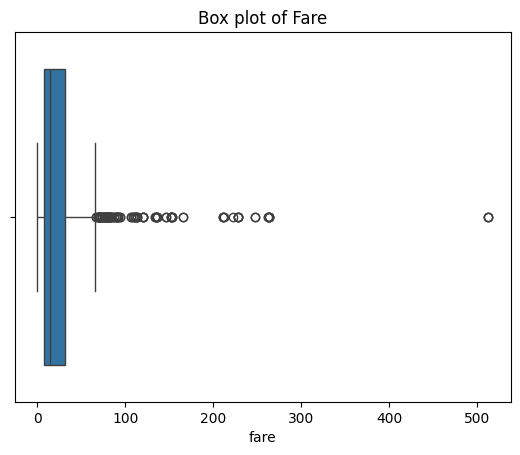

In [84]:
# Show boxplot
sns.boxplot(x="fare", data=df)
plt.title("Box plot of Fare")


## Filtering & Slicing
- Subset by condition (e.g., age > 50, survived passengers)
- Select specific columns for analysis
### Filtering

In [85]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [97]:
female_pass = df[df["sex"] == "female"]
first_class_pass = df[df["class"] == "First"]
female_first_class_pass = df[(df["sex"] == "female") & (df["class"] == "First")]

In [98]:
female_first_class_pass.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False


### Slicing

In [106]:
df[["sex", "age"]].head()

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0


In [108]:
df.loc[:, ["age", "who"]].head()

,age,who
0,22.0,man
1,38.0,woman
2,26.0,woman
3,35.0,woman
4,35.0,man


In [114]:
df.loc[1:10, ["age", "deck"]]

,age,deck
1,38.0,C
2,26.0,NaN
3,35.0,C
4,35.0,NaN
5,NaN,NaN
6,54.0,E
7,2.0,NaN
8,27.0,NaN
9,14.0,NaN
10,4.0,G


### Filtering and Slicing

In [116]:
# Female with first class and filter only for age and alive
female_cond = df["sex"] == "female"
first_class_cond = df["class"] == "First"
df.loc[female_cond & first_class_cond, ["age", "alive"]]

,age,alive
1,38.0,yes
3,35.0,yes
11,58.0,yes
31,NaN,yes
52,49.0,yes
...,...,...
856,45.0,yes
862,48.0,yes
871,47.0,yes
879,56.0,yes



## Grouping & Subsets
- Male vs Female, Survived vs Not Survived
- Compare statistics across groups

In [118]:
# group by sex and sum of survived
df.groupby("sex")["survived"].sum()

,survived
sex,
female,233
male,109
